In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df2021 = pd.read_csv('2021-PART_I_AND_II_CRIMES.csv')

In [4]:
df2021['CATEGORY'].unique()

array(['VANDALISM', 'LIQUOR LAWS', 'GRAND THEFT AUTO', 'LARCENY THEFT',
       'MISDEMEANORS MISCELLANEOUS', 'OFFENSES AGAINST FAMILY',
       'NON-AGGRAVATED ASSAULTS', 'VEHICLE / BOATING LAWS', 'ROBBERY',
       'NARCOTICS', 'BURGLARY', 'WEAPON LAWS', 'DRUNK / ALCOHOL / DRUGS',
       'FELONIES MISCELLANEOUS', 'FORGERY', 'FRAUD AND NSF CHECKS',
       'AGGRAVATED ASSAULT', 'SEX OFFENSES MISDEMEANORS',
       'RECEIVING STOLEN PROPERTY', 'SEX OFFENSES FELONIES',
       'DRUNK DRIVING VEHICLE / BOAT', 'FORCIBLE RAPE',
       'DISORDERLY CONDUCT', 'WARRANTS', 'ARSON', 'VAGRANCY',
       'CRIMINAL HOMICIDE', 'GAMBLING', 'FEDERAL OFFENSES WITH MONEY',
       'FEDERAL OFFENSES W/O MONEY'], dtype=object)

In [30]:
excluded_categories = ['LIQUOR LAWS', 'VEHICLE / BOATING LAWS', 'FRAUD AND NSF CHECKS', 'RECEIVING STOLEN PROPERTY',
                      'WARRANTS', 'GAMBLING', 'DRUNK DRIVING VEHICLE / BOAT']

included_columns = ['LURN_SAK', 'INCIDENT_DATE', 'CATEGORY', 'STAT', 'ADDRESS', 'LONGITUDE', 'LATITUDE', 'PART_CATEGORY' ]
boundaries = [[-118.4002, -118.3428], [34.0751, 34.1058]] #[long, lat]

In [6]:
df2021 = df2021.query('CATEGORY not in @excluded_categories')
df2021 = df2021[included_columns]

In [7]:
df2021.head()

,LURN_SAK,INCIDENT_DATE,CATEGORY,STAT,ADDRESS,LONGITUDE,LATITUDE,PART_CATEGORY
0,19621802,06/11/2021 03:06:00 AM,VANDALISM,263,"3600 IMPERIAL HWY, LYNWOOD, CA",-118.201,33.931,2
2,19602385,05/19/2021 03:30:00 PM,GRAND THEFT AUTO,91,"3300 LYNOAK DR, CLAREMONT, CA 91711",-117.739,34.104,1
3,19631339,06/24/2021 01:00:00 AM,GRAND THEFT AUTO,91,"22400 S ISLAND AVE, CARSON, CA",-118.266,33.822,1
4,19559742,04/03/2021 12:00:00 PM,LARCENY THEFT,389,"1700 MANZANITA PARK AVE, MALIBU, CA",-118.647,34.067,1
5,19668891,08/03/2021 05:28:00 AM,LARCENY THEFT,89,"37500 OAKHILL ST, PALMDALE, CA 93552",-118.048,34.565,1


In [21]:
boundaries[0][0]<-119.35<boundaries[0][1]

False

In [39]:
#data filter
df2021 = df2021.query('CATEGORY not in @excluded_categories')
df2021 = df2021[included_columns]
df2021_filtered = df2021.query('@boundaries[0][0] < LONGITUDE < @boundaries[0][1]')
df2021_filtered = df2021_filtered.query('@boundaries[1][0] < LATITUDE < @boundaries[1][1]')


In [40]:
df2021_filtered['CATEGORY'].value_counts()

LARCENY THEFT                   942
NON-AGGRAVATED ASSAULTS         346
BURGLARY                        306
VANDALISM                       284
GRAND THEFT AUTO                162
AGGRAVATED ASSAULT              134
MISDEMEANORS MISCELLANEOUS      132
NARCOTICS                       124
ROBBERY                         112
DRUNK DRIVING VEHICLE / BOAT     79
DRUNK / ALCOHOL / DRUGS          61
WEAPON LAWS                      49
FELONIES MISCELLANEOUS           49
FORGERY                          34
SEX OFFENSES MISDEMEANORS        28
DISORDERLY CONDUCT               21
ARSON                            14
FORCIBLE RAPE                     4
SEX OFFENSES FELONIES             4
FEDERAL OFFENSES WITH MONEY       3
OFFENSES AGAINST FAMILY           3
CRIMINAL HOMICIDE                 1
Name: CATEGORY, dtype: int64

In [41]:
df2021_filtered.to_csv('filtered_df.csv')

In [42]:
df2020 = pd.read_csv('2020-PART_I_AND_II_CRIMES.csv')

In [34]:
df2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152556 entries, 0 to 152555
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   LURN_SAK                152556 non-null  int64  
 1   INCIDENT_DATE           152556 non-null  object 
 2   INCIDENT_REPORTED_DATE  152556 non-null  object 
 3   CATEGORY                152556 non-null  object 
 4   STAT                    152556 non-null  int64  
 5   STAT_DESC               152556 non-null  object 
 6   ADDRESS                 150833 non-null  object 
 7   STREET                  149870 non-null  object 
 8   CITY                    150833 non-null  object 
 9   ZIP                     84838 non-null   float64
 10  INCIDENT_ID             152556 non-null  object 
 11  REPORTING_DISTRICT      152556 non-null  int64  
 12  SEQ                     152556 non-null  int64  
 13  GANG_RELATED            152556 non-null  object 
 14  UNIT_ID             

In [35]:
df2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119104 entries, 0 to 141798
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   LURN_SAK                119104 non-null  int64  
 1   INCIDENT_DATE           119104 non-null  object 
 2   INCIDENT_REPORTED_DATE  119104 non-null  object 
 3   CATEGORY                119104 non-null  object 
 4   STAT                    119104 non-null  int64  
 5   STAT_DESC               119104 non-null  object 
 6   ADDRESS                 116672 non-null  object 
 7   STREET                  116107 non-null  object 
 8   CITY                    116672 non-null  object 
 9   ZIP                     65317 non-null   float64
 10  INCIDENT_ID             119104 non-null  object 
 11  REPORTING_DISTRICT      119104 non-null  int64  
 12  SEQ                     119104 non-null  int64  
 13  GANG_RELATED            119104 non-null  object 
 14  UNIT_ID             

In [43]:
df2020 = df2020.query('CATEGORY not in @excluded_categories')
df2020 = df2020[included_columns]
df2020_filtered = df2020.query('@boundaries[0][0] < LONGITUDE < @boundaries[0][1]')
df2020_filtered = df2020_filtered.query('@boundaries[1][0] < LATITUDE < @boundaries[1][1]')

In [45]:
df2020_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2877 entries, 97 to 152490
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LURN_SAK       2877 non-null   int64  
 1   INCIDENT_DATE  2877 non-null   object 
 2   CATEGORY       2877 non-null   object 
 3   STAT           2877 non-null   int64  
 4   ADDRESS        2877 non-null   object 
 5   LONGITUDE      2877 non-null   float64
 6   LATITUDE       2877 non-null   float64
 7   PART_CATEGORY  2877 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 202.3+ KB


In [46]:
df2020_filtered.to_csv('filtered_df.csv', mode='a', header=False)

In [47]:
df2022 = pd.read_csv('PART_I_AND_II_CRIMES-YTD.csv')

In [48]:
df2022 = df2022.query('CATEGORY not in @excluded_categories')
df2022 = df2022[included_columns]
df2022_filtered = df2022.query('@boundaries[0][0] < LONGITUDE < @boundaries[0][1]')
df2022_filtered = df2022_filtered.query('@boundaries[1][0] < LATITUDE < @boundaries[1][1]')

In [49]:
df2022_filtered.to_csv('filtered_df.csv', mode='a', header=False)

In [50]:
df2019 = pd.read_csv('2019-PART_I_AND_II_CRIMES.csv')
df2018 = pd.read_csv('2018-PART_I_AND_II_CRIMES.csv')

In [51]:
df2019 = df2019.query('CATEGORY not in @excluded_categories')
df2019 = df2019[included_columns]
df2019_filtered = df2019.query('@boundaries[0][0] < LONGITUDE < @boundaries[0][1]')
df2019_filtered = df2019_filtered.query('@boundaries[1][0] < LATITUDE < @boundaries[1][1]')

In [52]:
df2018 = df2018.query('CATEGORY not in @excluded_categories')
df2018 = df2018[included_columns]
df2018_filtered = df2018.query('@boundaries[0][0] < LONGITUDE < @boundaries[0][1]')
df2018_filtered = df2018_filtered.query('@boundaries[1][0] < LATITUDE < @boundaries[1][1]')

In [54]:
df2018_filtered.to_csv('2018-2022.csv')
df2019_filtered.to_csv('2018-2022.csv', mode='a', header=False)
df2020_filtered.to_csv('2018-2022.csv', mode='a', header=False)
df2021_filtered.to_csv('2018-2022.csv', mode='a', header=False)
df2022_filtered.to_csv('2018-2022.csv', mode='a', header=False)


In [9]:
df = pd.read_csv('2018-2022.csv')

In [10]:
df.head(3)

,Unnamed: 0,LURN_SAK,INCIDENT_DATE,CATEGORY,STAT,ADDRESS,LONGITUDE,LATITUDE,PART_CATEGORY
0,16,18615198,06/19/2018 03:00:00 AM,GRAND THEFT AUTO,91,"1300 HARPER AVE, WEST HOLLYWOOD, CA",-118.368,34.095,1
1,101,18542039,04/08/2018 09:35:00 PM,AGGRAVATED ASSAULT,54,"600 ROBERTSON BLVD, WEST HOLLYWOOD, CA 90069",-118.385,34.080,1
2,185,18700869,09/18/2018 10:00:00 AM,VANDALISM,263,"7300 SANTA MONICA BLVD, WEST HOLLYWOOD, CA 90069",-118.351,34.092,2


In [29]:
df['CATEGORY'].value_counts()

LARCENY THEFT                   5930
NON-AGGRAVATED ASSAULTS         1666
VANDALISM                       1216
BURGLARY                        1164
NARCOTICS                       1125
MISDEMEANORS MISCELLANEOUS      1073
GRAND THEFT AUTO                 568
AGGRAVATED ASSAULT               529
ROBBERY                          504
DRUNK / ALCOHOL / DRUGS          476
DRUNK DRIVING VEHICLE / BOAT     416
FELONIES MISCELLANEOUS           234
WEAPON LAWS                      215
FORGERY                          194
SEX OFFENSES MISDEMEANORS        129
DISORDERLY CONDUCT               114
ARSON                             62
FEDERAL OFFENSES WITH MONEY       62
OFFENSES AGAINST FAMILY           35
VAGRANCY                          33
SEX OFFENSES FELONIES             20
FORCIBLE RAPE                     20
CRIMINAL HOMICIDE                  4
Name: CATEGORY, dtype: int64

<AxesSubplot:xlabel='LONGITUDE', ylabel='LATITUDE'>

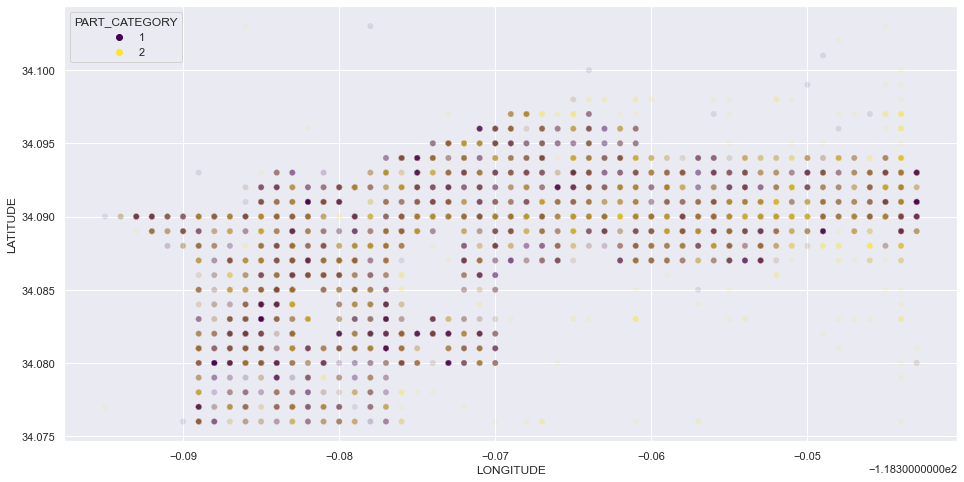

In [32]:
sns.set(rc={"figure.figsize":(16, 8)})
sns.scatterplot(data=df, x='LONGITUDE', y='LATITUDE', hue='PART_CATEGORY', alpha=0.1, palette='viridis')